- Author   -  Saurav vara prasad Channuri

- Roll No -  ES16BTECH11007

- cross - correlation










In [0]:
import numpy as np
import scipy.misc as sp
from skimage import io
from scipy import ndimage as nd
import matplotlib
import scipy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
first_image = io.imread("bicycle.bmp")
first_image_grey = io.imread('bicycle.bmp', as_gray=True)

second_image = io.imread("motorcycle.bmp")
second_image_grey = io.imread('motorcycle.bmp', as_gray=True)


In [161]:
# fillter = np.empty([3,3,screenshot.shape[2]])
print "real image shape = ", first_image.shape

# print "screenshot shape = ", screenshot.shape

real image shape =  (300, 453, 3)


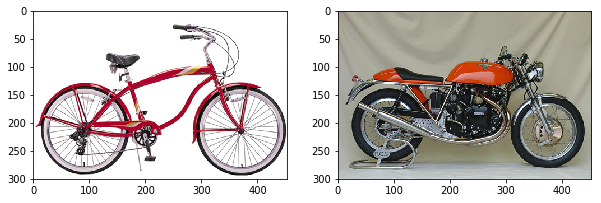

In [163]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(first_image)
axarr[1].imshow(second_image)

scipy.signal.correlate2d(real_image_grey, screenshot_grey, mode='same')

In [0]:
def pad( image, template, padding_mode ):
    
    if(padding_mode == "edge"):
      top = image[0]
      top = np.tile(top, (template.shape[0]/2, 1))
      image = np.vstack((top, image)) # top padding

      bottom = image[-1]
      bottom = np.tile(bottom,(template.shape[0]/2, 1))
      image = np.vstack((image, top)) # Botton padding


      left = image.T[0]
      left = np.tile(left, (template.shape[1]/2, 1))
      image = np.vstack((left, image.T)).T   # left padding

      right = image.T[-1]
      right = np.tile(right, (template.shape[1]/2, 1))
      image = np.vstack((image.T, right)).T  # right padding

    elif(padding_mode == "wrap"):
      top = image[image.shape[0]-(template.shape[0]/2) : , :]
      image = np.vstack((top, image))
      
      bottom = image[:template.shape[0]/2, :]
      image = np.vstack((image, bottom))
      
      left = image[: , image.shape[1] - (template.shape[1]/2): ]
      image = np.vstack((left.T, image.T)).T
      
      right = image[:, :template.shape[1]/2]
      image = np.vstack((image.T, right.T)).T
      
    return image
    
    

In [0]:
def plot(plot_data):
  
  # for adjusting the display figure size
  matplotlib.rcParams['figure.figsize'] = [10, 20]
  matplotlib.rcParams.update({'font.size': 10})
  
  
  first_convolve_output  = plot_data["convolve_output_first"]
  second_convolve_output = plot_data["convolve_output_second"]

  first_convolve_output_rev  = plot_data["convolve_output_first_rev"]
  second_convolve_output_rev = plot_data["convolve_output_second_rev"]
  
  first_convolve = plot_data["convolve_first"]
  second_convolve = plot_data["convolve_second"]
  
  first_convolve_rev = plot_data["convolve_first_rev"]
  second_convolve_rev = plot_data["convolve_second_rev"]

  # plotting images in a grid
#   y, x = np.unravel_index(np.argmax(corr_output), corr.shape) 

  fig, ([[ax_orig_one   , ax_orig_two    ],
         [ax_hybrid_one , ax_hybrid_two  ],
         [ax_kernel_one , ax_kernel_two  ],
         [ax_first      , ax_second      ],
         [ax_first_exp  , ax_second_exp  ],]) = plt.subplots(5, 2)

  # plotting real image
  ax_orig_one.imshow(plot_data["image_one"], cmap = 'gray')
  ax_orig_one.set_title('Original image')
  ax_orig_one.set_axis_off()
  
  # plotting real image
  ax_orig_two.imshow(plot_data["image_two"], cmap = 'gray')
  ax_orig_two.set_title('Original image')
  ax_orig_two.set_axis_off()

  # plotting correlation output
  ax_hybrid_one.imshow(first_convolve_output + second_convolve_output, cmap = 'gray')
  ax_hybrid_one.set_title('hybrid image')
  ax_hybrid_one.set_axis_off()

  # plotting correlation output
  ax_hybrid_two.imshow(first_convolve_rev + second_convolve_rev, cmap = 'gray')
  ax_hybrid_two.set_title('hybrid image')
  ax_hybrid_two.set_axis_off()
  
  #plotting the edges to show that correlation is working
  ax_kernel_one.imshow(plot_data["kernel_one"], cmap = 'gray')
  ax_kernel_one.set_title('high pass filter')
  ax_kernel_one.set_axis_off()                         
  
  #plotting the edges to show that correlation is working
  ax_kernel_two.imshow(plot_data["kernel_two"], cmap = 'gray')
  ax_kernel_two.set_title('low pass filter')
  ax_kernel_two.set_axis_off()
  
  #plotting the edges to show that correlation is working
  ax_first.imshow(first_convolve_output, cmap = 'gray')
  ax_first.set_title('first image convolution output (hf)')
  ax_first.set_axis_off()

  #plotting cross correlation output with normalization
  ax_second.imshow(second_convolve_output, cmap = 'gray')
  ax_second.set_title('second image convolution output (lf)')
  ax_second.set_axis_off()

  #plotting cross correlation output with normalization
  ax_first_exp.imshow(first_convolve_output_rev, cmap = 'gray')
  ax_first_exp.set_title('first image convolution output (lf)')
  ax_first_exp.set_axis_off()
  
  #plotting cross correlation output with normalization
  ax_second_exp.imshow(second_convolve_output_rev, cmap = 'gray')
  ax_second_exp.set_title('second image convolution output (hf)')
  ax_second_exp.set_axis_off()

#   ax_orig.plot(x, y, 'ro', linewidth = 100)
#   ax_corr.plot(x, y, 'ro', linewidth = 100)
#   ax_corr_norm.plot(x, y, 'ro', linewidth = 100)

  fig.show()

In [0]:
def convolution(data):
  image    = data["image"]
  template = data["kernel"]
  padding_mode  = data["padding"]
  
  
  padded = pad(image, template, padding_mode)
  corr_output = np.empty(image.shape)

  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          temp_matrix = padded[i:i+template.shape[0] , j:j+template.shape[1]]
          corr_output[i][j] = np.sum(template*temp_matrix)
  
  return corr_output, padded

In [0]:
def invert(template):
 
  inverted = np.empty(template.shape)

  for i in range(template.shape[0]):
    for j in range(template.shape[1]):
      inverted[-i-1, -j-1] = template[i,j]
      
  return inverted

In [0]:
def convolve(data):
  
  image_one = data["image_one"]
  image_two = data["image_two"]
  kernel_one = data["kernel_one"]
  kernel_two = data["kernel_two"]
  template = invert(kernel)

  
  data_first = {
                  "image"   : image_one,
                  "kernel"  : kernel_one,
                  "padding" : "wrap"
               }
  
  
  data_second = {
                  "image"   : image_two,
                  "kernel"  : kernel_two,
                  "padding" : "wrap"
                }
  
 
  ######################################################################
  
  data_first_reverse = {
                          "image"   : image_one,
                          "kernel"  : kernel_two,
                          "padding" : "wrap"
                       }
  
  
  data_second_reverse = {
                            "image"   : image_two,
                            "kernel"  : kernel_one,
                            "padding" : "wrap"
                        }
  
 ####################################################################### 
  
  convolve_output_first, padded_first    = convolution(data_first)
  
  convolve_output_second, padded_second  = convolution(data_second)
  
  convolve_first                         = scipy.signal.convolve2d(image_one,
                                                                   kernel_one,
                                                                   boundary='symm',
                                                                   mode='same')
  
  convolve_second                        = scipy.signal.convolve2d(image_two,
                                                                   kernel_two,
                                                                   boundary='symm',
                                                                   mode='same')
  
#########################################################################
  
  convolve_output_first_rev, padded_first_rev    = convolution(data_first)
  
  convolve_output_second_rev, padded_second_rev  = convolution(data_second)
  
  convolve_first_rev                         = scipy.signal.convolve2d(image_one,
                                                                   kernel_two,
                                                                   boundary='symm',
                                                                   mode='same')
  
  convolve_second_rev                        = scipy.signal.convolve2d(image_two,
                                                                   kernel_one,
                                                                   boundary='symm',
                                                                   mode='same')
  
  ######################################################################
  
  
  
  
  print "convolution done \n"

  plot_data = {
                # real images
                "image_one"               : image_one,
                "image_two"               : image_two,
            
                # kernels (filters)
                "kernel_one"                : kernel_one,
                "kernel_two"                : kernel_two,
      
                # our convolution outputs
                "convolve_output_first"     : convolve_output_first,
                "convolve_output_second"    : convolve_output_second,
          
                # real convolution outputs
                "convolve_first"            : convolve_first,
                "convolve_second"           : convolve_second,
      
                # our convolution with filters reversed
                "convolve_output_first_rev" : convolve_output_first_rev,
                "convolve_output_second_rev": convolve_output_second_rev,
      
                # real convolution outputs with filters reversed
                "convolve_first_rev"        : convolve_first_rev,
                "convolve_second_rev"       : convolve_second_rev
    
              }
  
  
  plot(plot_data)
  print "plots done"
  print "____________________________________________________________\n"
  

convolution done 

plots done
____________________________________________________________



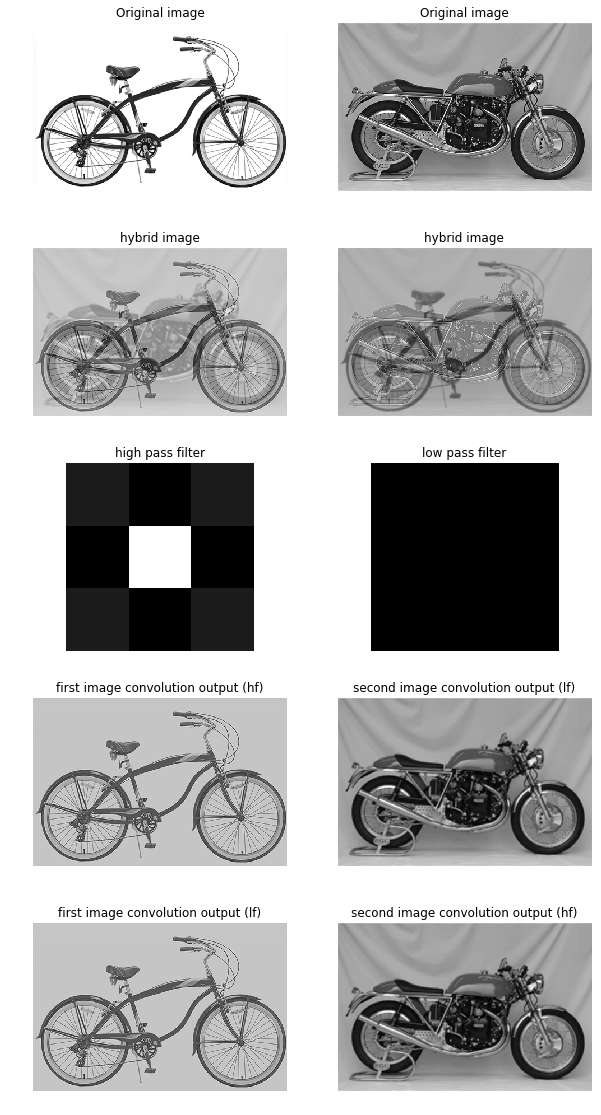

In [166]:

kernel_one  = np.array([[ 0, -1,  0],
                        [-1,  8, -1],
                        [ 0, -1,  0]])*(1.0/4)   # high pass filter


kernel_two = np.ones([3,3]) *(1.0/9)             # low pass filter


data = {
          "image_one"   : first_image_grey,
          "image_two"   : second_image_grey,
          "kernel_one"  : kernel_one,
          "kernel_two"  : kernel_two,
          "padding"     : "wrap"
       }

convolve(data)

In [57]:
first_image.shape

(300, 453, 3)

In [64]:
first_image.T[0].T.shape

(300, 453)

In [0]:
# plt.imshow(first_image + second_image)

In [0]:
def convolve(data):
  
  image_one = data["image_one"]
  image_two = data["image_two"]
  kernel_one = data["kernel_one"]
  kernel_two = data["kernel_two"]
  template = invert(kernel)
  
  hybrid_one = np.empty([image_one.shape[0], image_one.shape[1], 3])
  hybrid_two = np.empty([image_two.shape[0], image_two.shape[1], 3])

  hybrid_one_rev = np.empty([image_one.shape[0], image_one.shape[1], 3])
  hybrid_two_rev = np.empty([image_two.shape[0], image_two.shape[1], 3])
 

  for i in range(1):

  
  
  #####################################################################

    data_first = {
                    "image"   : image_one.T[i].T,
                    "kernel"  : kernel_one,
                    "padding" : "wrap"
                 }


    data_second = {
                    "image"   : image_two.T[i].T,
                    "kernel"  : kernel_two,
                    "padding" : "wrap"
                  }


    ######################################################################

    data_first_reverse = {
                            "image"   : image_one.T[i].T,
                            "kernel"  : kernel_two,
                            "padding" : "wrap"
                         }


    data_second_reverse = {
                              "image"   : image_two.T[i].T,
                              "kernel"  : kernel_one,
                              "padding" : "wrap"
                          }

   ####################################################################### 

    convolve_output_first, padded_first    = convolution(data_first)

    convolve_output_second, padded_second  = convolution(data_second)

    convolve_first                         = scipy.signal.convolve2d(image_one.T[i].T,
                                                                     kernel_one,
                                                                     boundary='symm',
                                                                     mode='same')

    convolve_second                        = scipy.signal.convolve2d(image_two.T[i].T,
                                                                     kernel_two,
                                                                     boundary='symm',
                                                                     mode='same')

  #########################################################################

    convolve_output_first_rev, padded_first_rev    = convolution(data_first)

    convolve_output_second_rev, padded_second_rev  = convolution(data_second)

    convolve_first_rev                         = scipy.signal.convolve2d(image_one.T[i].T,
                                                                     kernel_two,
                                                                     boundary='symm',
                                                                     mode='same')

    convolve_second_rev                        = scipy.signal.convolve2d(image_two.T[i].T,
                                                                     kernel_one,
                                                                     boundary='symm',
                                                                     mode='same')

    ######################################################################

    hybrid_one[:,:,i] = convolve_output_first
    hybrid_two[:,:,i] = convolve_output_second
    
    hybrid_one_rev[:,:,i] = convolve_output_first_rev
    hybrid_two_rev[:,:,i] = convolve_output_second_rev
    
  
  
  
  print "convolution done \n"

  plot_data = {
                # real images
                "image_one"                 : image_one,
                "image_two"                 : image_two,
            
                # kernels (filters)
                "kernel_one"                : kernel_one,
                "kernel_two"                : kernel_two,
      
                # real convolution outputs
                "convolve_output_first"     : convolve_output_first,
                "convolve_output_second"    : convolve_output_second,
          
                # our convolution outputs
                "convolve_first"            : convolve_first,
                "convolve_second"           : convolve_second,
      
                # our convolution with filters reversed
                "convolve_output_first_rev" : convolve_output_first_rev,
                "convolve_output_second_rev": convolve_output_second_rev,
      
                # real convolution outputs with filters reversed
                "convolve_first_rev"        : convolve_first_rev,
                "convolve_second_rev"       : convolve_second_rev,
      
                "hybrid_one"                : hybrid_one,
                "hybrid_two"                : hybrid_two,
      
                "hybrid_one_rev"            : hybrid_one_rev,
                "hybrid_two_rev"            : hybrid_two_rev
              }
  
  
  plot(plot_data)
  print "plots done"
  print "____________________________________________________________\n"
  